In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("arrhythmia.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
#Counting total Number of null values
nu = pd.isnull(df).sum().sum()
print(nu)

#Replacing ? with np.nan value
df = df.replace('?', np.NaN)

#finalyl counting total number of null values in dataset
nu = pd.isnull(df).sum().sum()
print(nu)

0
408


Text(0, 0.5, 'Total number of null value in each column')

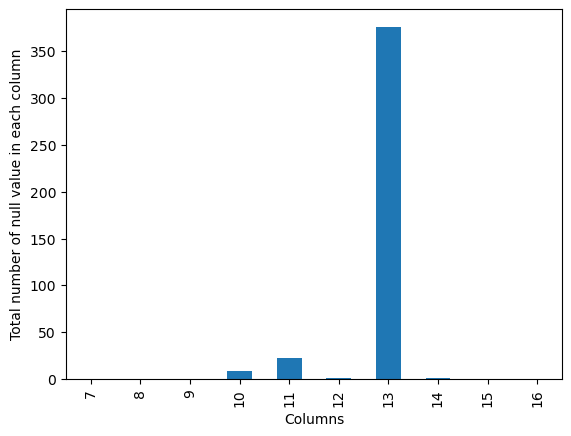

In [5]:
pd.isnull(df).sum()[7:17].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [6]:
#Dropping the column 13

df.drop(columns = 13, inplace=True)

In [7]:
new_df = df.copy()

In [8]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [9]:
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [10]:
pd.isnull(new_df).sum().sum()

0

In [11]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [12]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [13]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [14]:
final_df.shape

(452, 278)

In [15]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [16]:
t=new_df.sort_values(by=["class"])

In [17]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

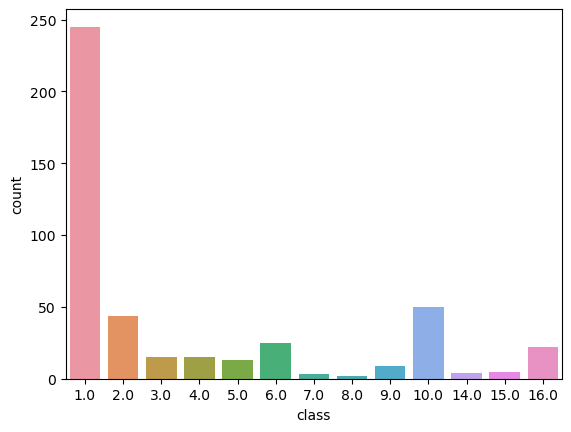

In [18]:
sns.countplot(x ='class',data =new_df) 
plt.show() 

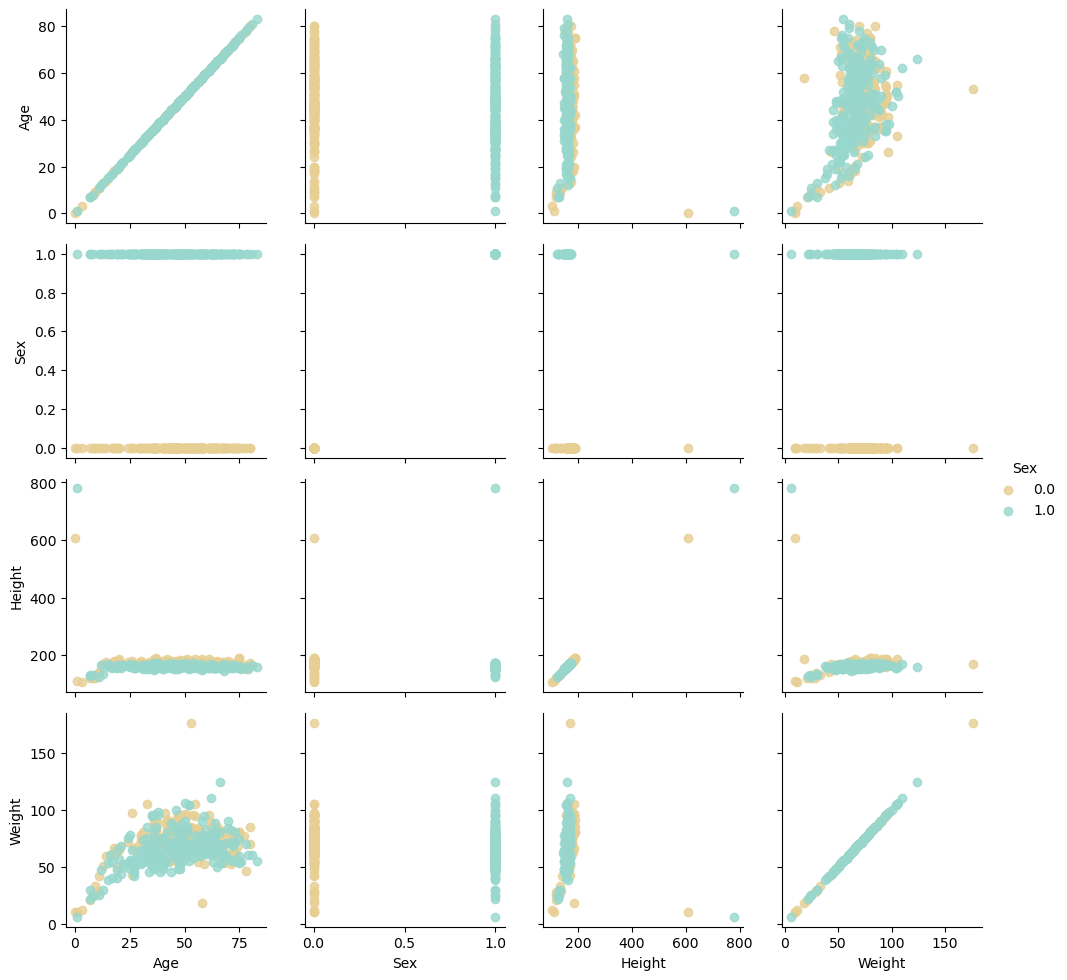

In [19]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [20]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [21]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [22]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

In [23]:
#performing over sampling

from imblearn.over_sampling import ADASYN, SMOTE
ros = ADASYN(random_state=0, n_neighbors = 1)
X_resampled, y_resampled = ros.fit_resample(final_df, target)

X_resampled.shape

(3207, 278)

In [24]:
#finding frequency of each class

import collections
counter = collections.Counter(y_resampled)
counter

Counter({8.0: 246,
         6.0: 245,
         10.0: 260,
         1.0: 245,
         7.0: 246,
         14.0: 244,
         3.0: 246,
         16.0: 242,
         2.0: 254,
         4.0: 246,
         5.0: 243,
         9.0: 245,
         15.0: 245})

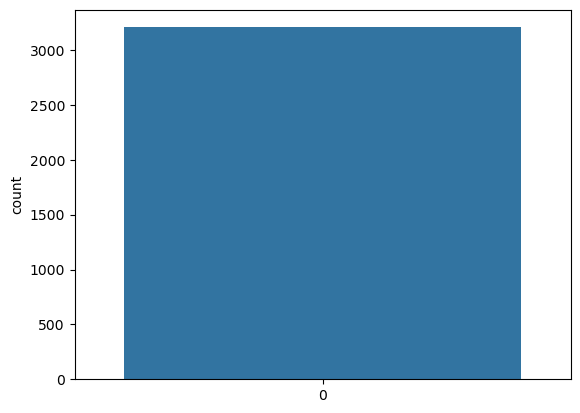

In [25]:
sns.countplot(data = y_resampled) 
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=42)
Xtrain2 = Xtrain
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain1 = scaler.transform(Xtrain)
Xtest1 = scaler.transform(Xtest)
Xtrain = pd.DataFrame(Xtrain1, columns = Xtrain.columns)
Xtest = pd.DataFrame(Xtest1, columns = Xtest.columns)
Xtrain

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,0.236683,1.356868,-0.168780,-0.252894,-0.670555,0.149384,1.268554,-1.097956,0.115490,-0.032928,...,-0.235511,0.639528,-0.470090,-0.233324,-0.033306,0.0,0.401426,-1.087690,-0.628712,-1.052705
1,-0.866575,1.356868,0.153078,-0.433204,-0.584040,0.040623,0.516219,-1.008469,-0.402983,0.637242,...,-0.441336,-1.332386,2.061706,1.077176,-0.033306,0.0,-0.164444,-1.645771,1.603365,-0.394510
2,-0.525049,-0.917357,-0.056816,-0.175565,1.075513,0.793147,0.516219,1.346703,0.484027,0.736326,...,0.413009,-2.515533,-0.049829,0.329612,-0.033306,0.0,0.422764,-1.292152,-0.389743,-1.023292
3,-0.677851,-0.917357,0.455013,0.214331,-0.177879,0.470271,0.057450,-0.132023,-0.116803,-1.327609,...,0.767087,0.639528,-1.140316,0.018127,-0.033306,0.0,0.221806,0.338270,-1.025683,-0.422112
4,0.368821,-0.917357,0.416647,0.281438,-0.265886,-0.094446,0.321669,0.445660,0.189921,-0.663536,...,0.339554,-2.799320,-0.129822,0.893251,-0.033306,0.0,0.812682,-0.633560,-0.302908,-0.619037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0.408106,1.356868,-0.308633,-0.471735,-1.159341,-0.171742,-0.796065,-0.772814,0.122522,-0.900544,...,0.412797,0.639528,-1.744699,-0.143919,-0.033306,0.0,0.716368,-0.358780,-1.427200,-1.161621
2561,1.150814,1.356868,-0.196746,0.274936,-1.039126,0.075171,-1.181962,-0.189709,0.630516,-0.102999,...,-0.108549,0.487032,-0.579012,0.489329,-0.033306,0.0,-0.589469,0.012534,-0.573209,-0.351174
2562,-1.826024,1.356868,-0.009355,-1.824859,-0.619624,-0.262576,-0.787649,1.803746,-0.095593,0.119186,...,-0.037062,-1.205539,1.303476,-0.084243,-0.033306,0.0,-0.070011,1.713544,0.336905,1.303353
2563,0.792368,-0.917357,0.411022,0.127081,-0.422747,0.814299,-1.068910,1.681405,0.658970,0.925895,...,0.001284,-0.087475,-0.428045,0.452716,-0.033306,0.0,1.123166,-0.313094,-0.269577,-0.475993


In [27]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
extra_tree_forest = RandomForestClassifier(n_estimators = 5000, criterion ='gini', n_jobs = -1, random_state = 42)
 
# Training the model
extra_tree_forest.fit(X_resampled, y_resampled)
 
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
imp = pd.DataFrame({'name': Xtrain.columns, 'score': extra_tree_forest.feature_importances_})
imp.columns = ['name', 'score']
selected_features = imp.sort_values('score', ascending = False)[:10].iloc[:,0]
print(selected_features)
Xtrain = Xtrain.loc[:, selected_features]
Xtest = Xtest.loc[:, selected_features]

13     Heart_Rate
8           P_Int
5         P-R_Int
147          V601
119          V309
106          V208
112          V302
226         V1228
170        DII172
228         V2230
Name: name, dtype: object


In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 13, random_state = 42).fit(Xtrain)
Xtrain['GMM'] = gmm.predict(Xtrain)
Xtest['GMM'] = gmm.predict(Xtest)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.19      0.73      0.30        15
         2.0       0.81      0.75      0.78        63
         3.0       0.94      0.98      0.96        46
         4.0       0.96      0.88      0.92        51
         5.0       0.96      0.91      0.94        58
         6.0       0.98      0.74      0.84        54
         7.0       1.00      1.00      1.00        46
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        45
        10.0       0.81      0.79      0.80        53
        14.0       1.00      0.98      0.99        44
        15.0       1.00      1.00      1.00        43
        16.0       0.98      0.72      0.83        72

    accuracy                           0.88       642
   macro avg       0.89      0.88      0.87       642
weighted avg       0.93      0.88      0.90       642



In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10,random_state = 42, solver='lbfgs', max_iter=2000) 
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.15      0.39      0.22        23
         2.0       0.52      0.62      0.57        48
         3.0       0.96      0.90      0.93        51
         4.0       0.81      0.59      0.68        64
         5.0       0.87      0.72      0.79        67
         6.0       0.49      0.38      0.43        52
         7.0       0.93      0.88      0.91        49
         8.0       1.00      0.96      0.98        54
         9.0       1.00      1.00      1.00        45
        10.0       0.67      0.59      0.63        59
        14.0       1.00      0.98      0.99        44
        15.0       1.00      1.00      1.00        43
        16.0       0.34      0.42      0.37        43

    accuracy                           0.73       642
   macro avg       0.75      0.73      0.73       642
weighted avg       0.78      0.73      0.75       642



In [31]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dtc.fit(Xtrain, ytrain) 
ypred = dtc.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.46      0.59      0.51        46
         2.0       0.79      0.81      0.80        57
         3.0       0.94      0.98      0.96        46
         4.0       0.87      0.82      0.85        50
         5.0       0.95      0.88      0.91        59
         6.0       0.83      0.85      0.84        40
         7.0       0.98      1.00      0.99        45
         8.0       0.98      1.00      0.99        51
         9.0       0.96      1.00      0.98        43
        10.0       0.73      0.70      0.72        54
        14.0       0.98      0.98      0.98        43
        15.0       1.00      0.98      0.99        44
        16.0       0.89      0.73      0.80        64

    accuracy                           0.86       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.86      0.87       642



In [32]:
from sklearn.svm import SVC 
svclin = SVC(kernel = 'linear', random_state = 42,probability=True)
svclin.fit(Xtrain, ytrain) 
ypred = svclin.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.29      0.40      0.34        42
         2.0       0.67      0.58      0.62        67
         3.0       0.98      0.96      0.97        49
         4.0       0.85      0.68      0.75        59
         5.0       0.84      0.74      0.79        62
         6.0       0.44      0.46      0.45        39
         7.0       1.00      0.96      0.98        48
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        45
        10.0       0.73      0.64      0.68        59
        14.0       1.00      0.96      0.98        45
        15.0       1.00      1.00      1.00        43
        16.0       0.34      0.56      0.42        32

    accuracy                           0.77       642
   macro avg       0.78      0.77      0.77       642
weighted avg       0.80      0.77      0.78       642



In [33]:
svcrbf = SVC(kernel='rbf', random_state = 42, probability = True)
svcrbf.fit(Xtrain, ytrain)
ypred = svcrbf.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.24      0.47      0.31        30
         2.0       0.59      0.64      0.61        53
         3.0       0.67      1.00      0.80        32
         4.0       0.83      0.51      0.63        77
         5.0       0.65      0.86      0.74        42
         6.0       0.41      0.35      0.38        48
         7.0       1.00      0.94      0.97        49
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        45
        10.0       0.60      0.66      0.63        47
        14.0       0.95      0.98      0.96        42
        15.0       1.00      1.00      1.00        43
        16.0       0.53      0.34      0.41        82

    accuracy                           0.71       642
   macro avg       0.73      0.75      0.73       642
weighted avg       0.73      0.71      0.71       642



In [34]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(Xtrain, ytrain) 
ypred = svclin.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.29      0.40      0.34        42
         2.0       0.67      0.58      0.62        67
         3.0       0.98      0.96      0.97        49
         4.0       0.85      0.68      0.75        59
         5.0       0.84      0.74      0.79        62
         6.0       0.44      0.46      0.45        39
         7.0       1.00      0.96      0.98        48
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        45
        10.0       0.73      0.64      0.68        59
        14.0       1.00      0.96      0.98        45
        15.0       1.00      1.00      1.00        43
        16.0       0.34      0.56      0.42        32

    accuracy                           0.77       642
   macro avg       0.78      0.77      0.77       642
weighted avg       0.80      0.77      0.78       642



In [35]:
from sklearn.ensemble import StackingClassifier
stackingclf = StackingClassifier(
    estimators = [
        ('knearest', knn),
        ('logreg', lr),
        ('dectree', dtc),
        ('linsvc', svclin),
        ('rbfsvc', svcrbf),
        ('randfor', rfc)
    ],
    final_estimator = RandomForestClassifier(random_state = 43),
    cv = 5)

stackingclf.fit(Xtrain, ytrain)
ypred = stackingclf.predict(Xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.85      0.75      0.79        67
         2.0       0.88      0.93      0.90        55
         3.0       0.94      0.98      0.96        46
         4.0       0.96      0.98      0.97        46
         5.0       0.95      0.98      0.96        53
         6.0       0.93      1.00      0.96        38
         7.0       1.00      1.00      1.00        46
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        45
        10.0       0.88      0.94      0.91        49
        14.0       1.00      0.96      0.98        45
        15.0       1.00      1.00      1.00        43
        16.0       0.98      0.91      0.95        57

    accuracy                           0.95       642
   macro avg       0.95      0.96      0.95       642
weighted avg       0.95      0.95      0.95       642



In [37]:
from joblib import dump, load

sc = StandardScaler().fit(Xtrain2.loc[:, selected_features])
dump(stackingclf, 'stackingclf.joblib')
dump(gmm, 'gmm.joblib')
dump(sc, 'sc.joblib')

['sc.joblib']

In [38]:
new_df.loc[:, np.concatenate((selected_features, ['class']), axis = 0)]

,Heart_Rate,P_Int,P-R_Int,V601,V309,V208,V302,V1228,DII172,V2230,class
0,0.0,121.0,193.0,56.0,0.0,0.0,48.0,-24.0,1.7,0.0,8.0
1,0.0,39.0,174.0,48.0,0.0,0.0,48.0,-21.6,5.5,0.4,6.0
2,0.0,102.0,163.0,44.0,0.0,0.0,20.0,18.7,6.4,-0.9,10.0
3,0.0,143.0,202.0,64.0,0.0,0.0,40.0,-18.2,9.1,2.1,1.0
4,1.0,103.0,181.0,52.0,0.0,0.0,48.0,-25.0,1.6,-0.2,7.0
...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,117.0,199.0,40.0,0.0,0.0,52.0,-18.6,1.9,1.0,1.0
448,0.0,73.0,137.0,52.0,0.0,0.0,24.0,-5.3,10.5,1.7,10.0
449,0.0,116.0,176.0,44.0,0.0,0.0,68.0,23.1,1.6,-4.1,2.0
450,0.0,63.0,106.0,44.0,0.0,0.0,40.0,-28.7,9.3,2.0,1.0


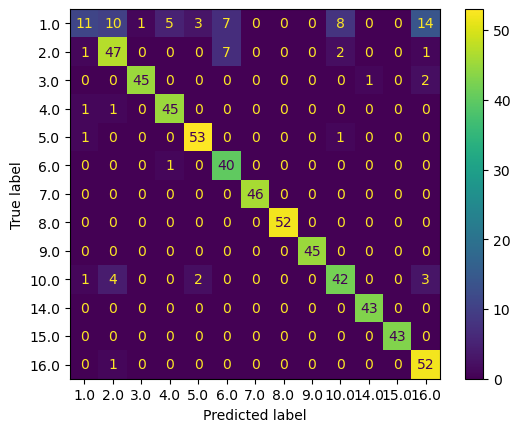

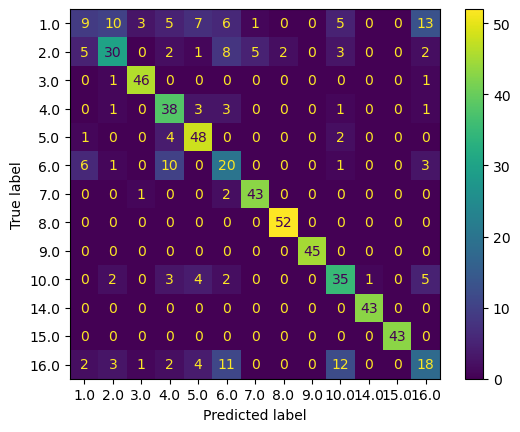

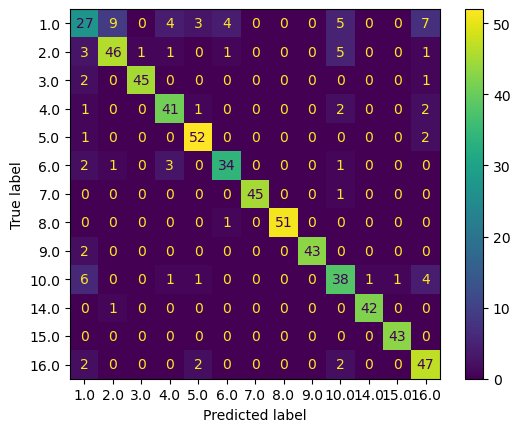

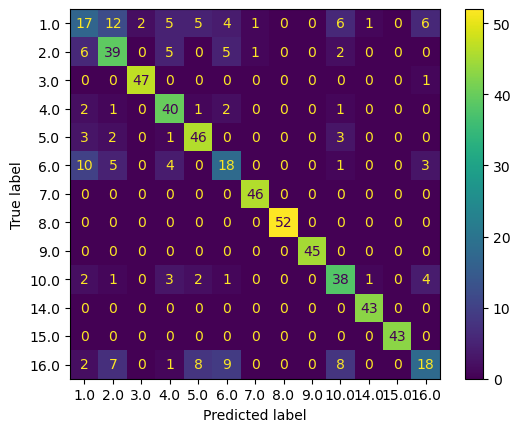

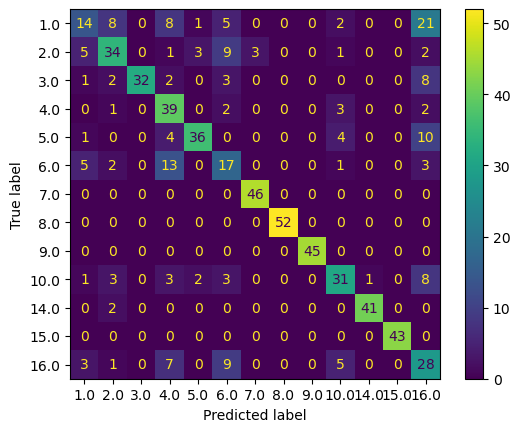

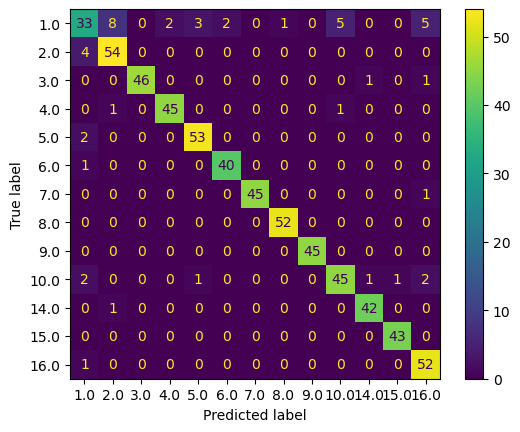

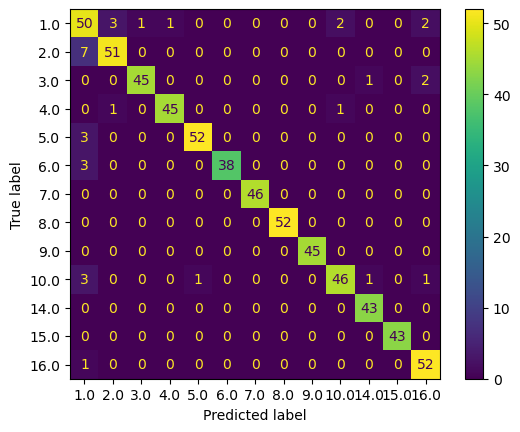

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
for i, estimator in enumerate([knn, lr, dtc, svclin, svcrbf, rfc, stackingclf]):
    ypred = estimator.predict(Xtest)
    cm = ConfusionMatrixDisplay.from_predictions(ytest,ypred)
    cm.figure_.savefig(f'cm_{i}.png',dpi=100)

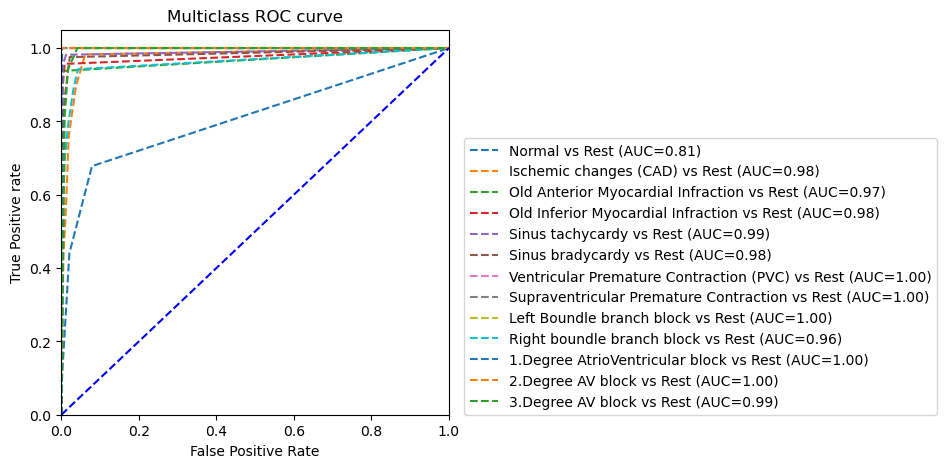

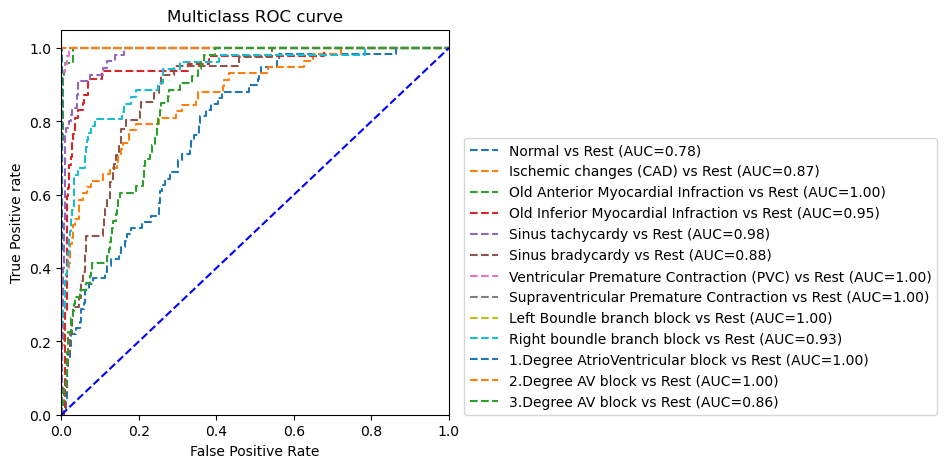

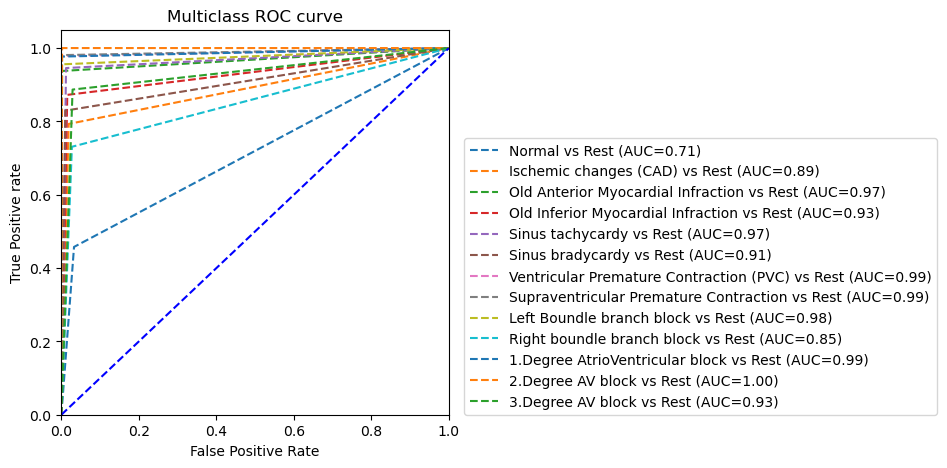

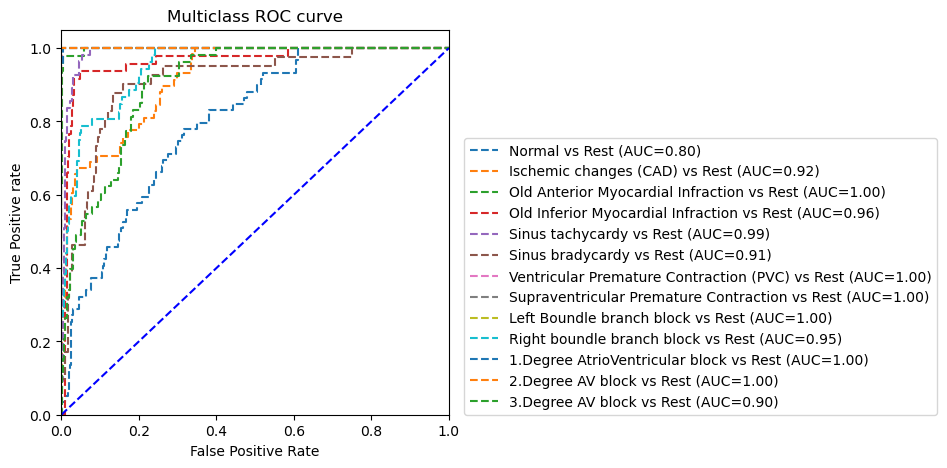

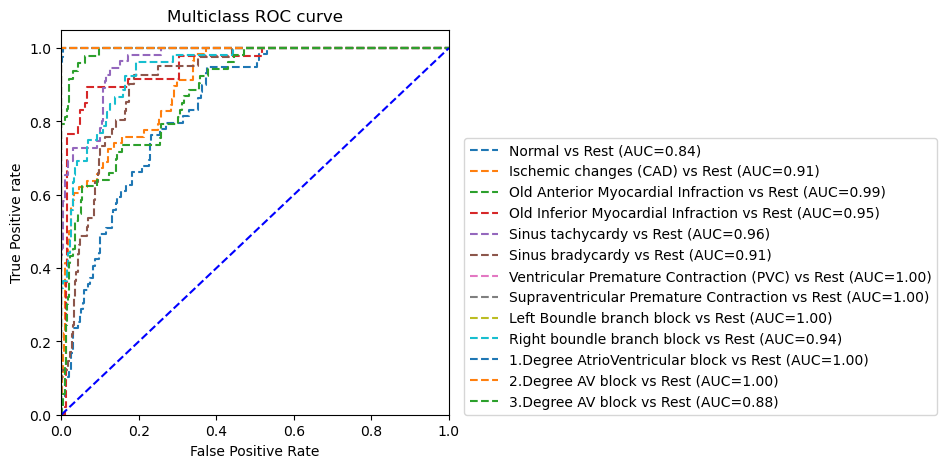

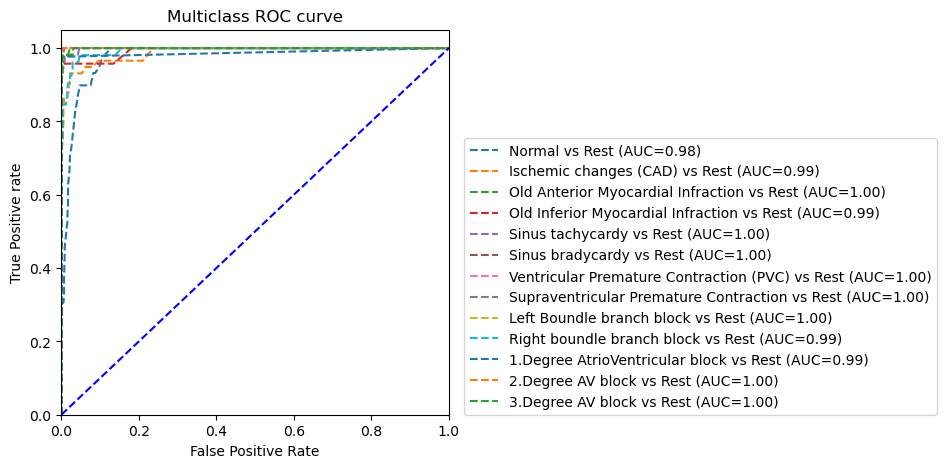

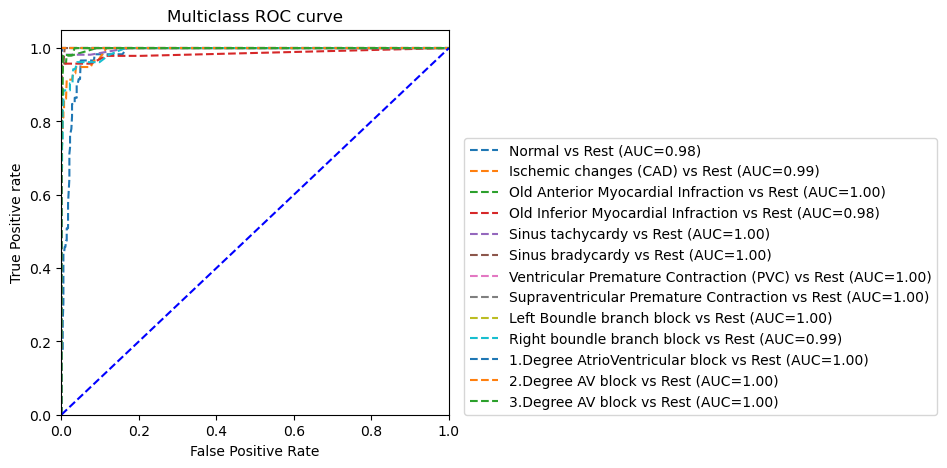

In [40]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, roc_curve
for j, estimator in enumerate([knn, lr, dtc, svclin, svcrbf, rfc, stackingclf]):
    plt.figure(figsize=(5,5))
    y_test_binarized=label_binarize(ytest,classes=np.unique(ytest))

    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()

    n_class = len(np.unique(ytest))
    y_pred = estimator.predict(Xtest)
    pred_prob = estimator.predict_proba(Xtest)
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # plotting    
        plt.plot(fpr[i], tpr[i], linestyle='--', 
                 label='%s vs Rest (AUC=%0.2f)'%(class_names[i],roc_auc[i]))

    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc=(1.04,0))
    plt.savefig(f"roc_{j}.png", dpi = 100, bbox_inches="tight")

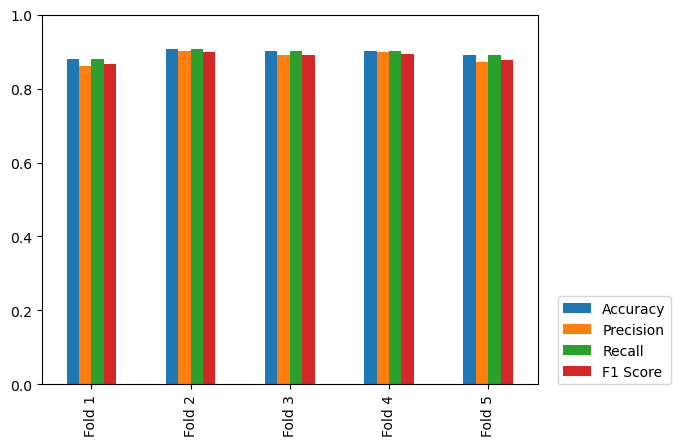

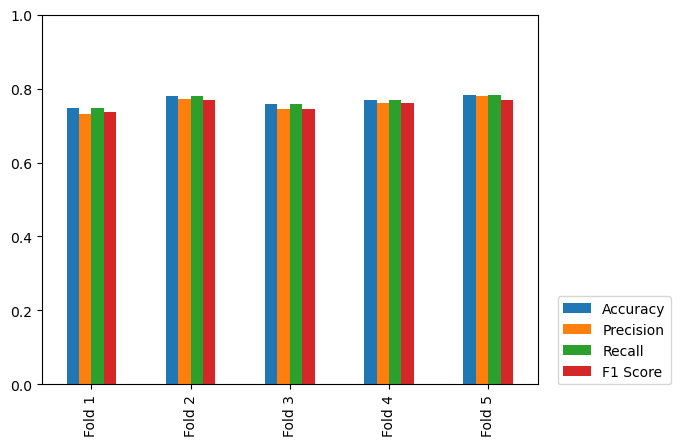

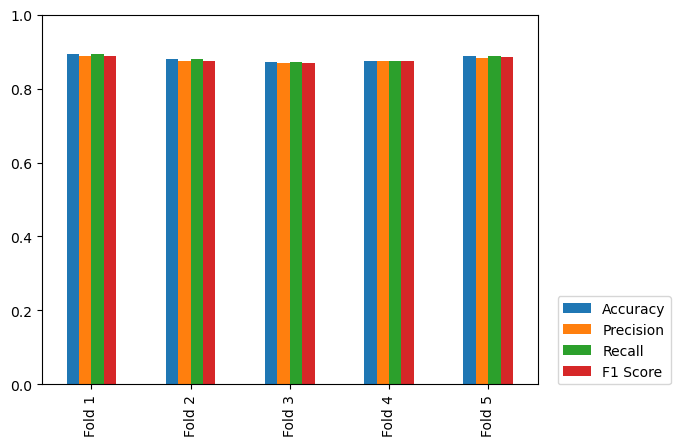

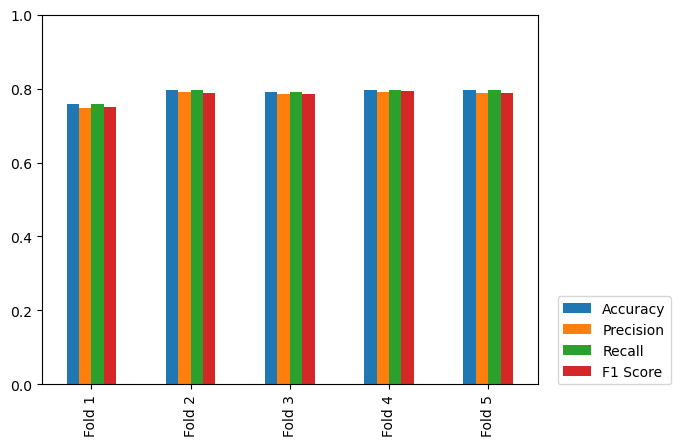

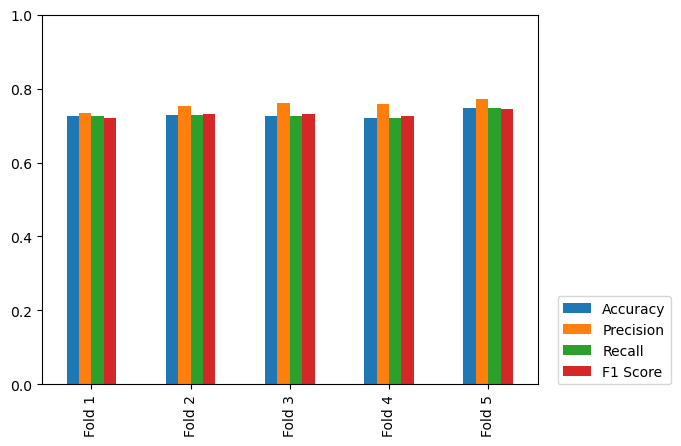

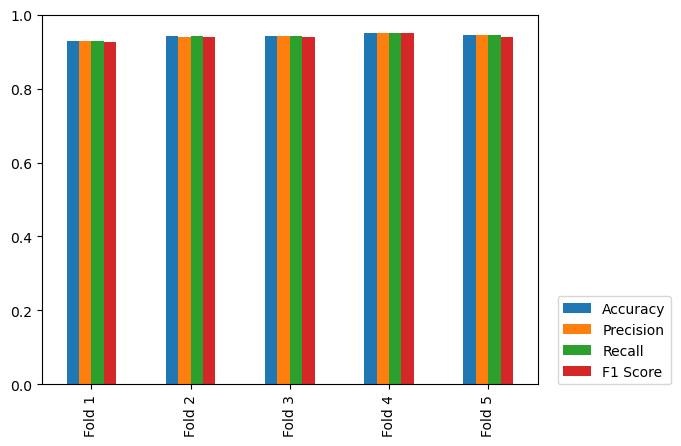

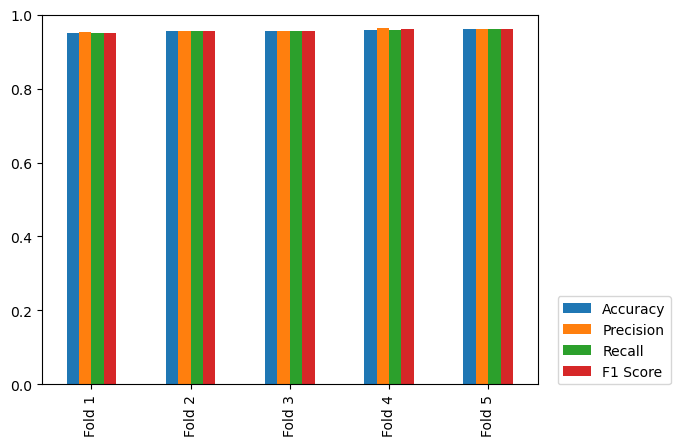

In [41]:
from sklearn.model_selection import cross_validate
for j, estimator in enumerate([knn, lr, dtc, svclin, svcrbf, rfc, stackingclf]):
    crossval_scores = cross_validate(estimator, Xtrain, ytrain, scoring=("accuracy", "precision_weighted", "recall_weighted", "f1_weighted"), cv=5)
    crossval_scores.pop('fit_time')
    crossval_scores.pop('score_time')
    for k in crossval_scores.keys():
        crossval_scores[k] = list(crossval_scores[k])
    x = pd.DataFrame(crossval_scores)
    x.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    x.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
    x.plot.bar(ylim = (0,1))
    plt.legend(loc=(1.04,0))
    plt.savefig(f"cv_{j}.png", dpi = 100, bbox_inches="tight")